## Project
    For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

### Use the data to complete the following tasks:

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

For each chart, make sure to use a copy of the data frame.

In [9]:
#Answer

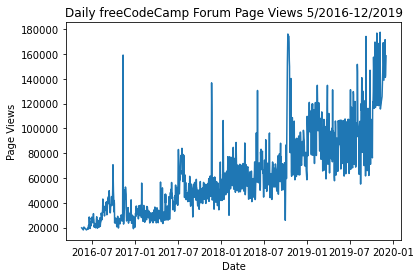

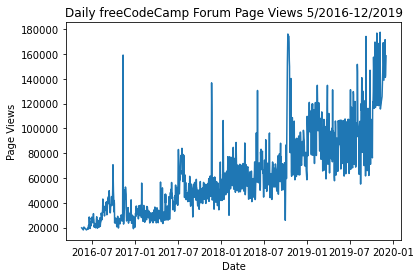

In [10]:
draw_line_plot()

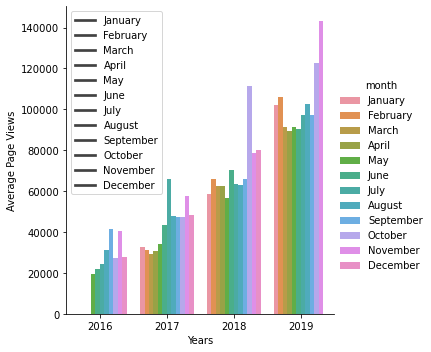

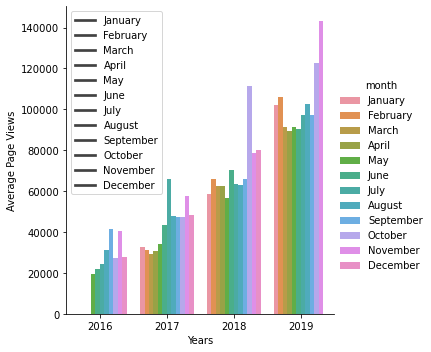

In [11]:
draw_bar_plot()

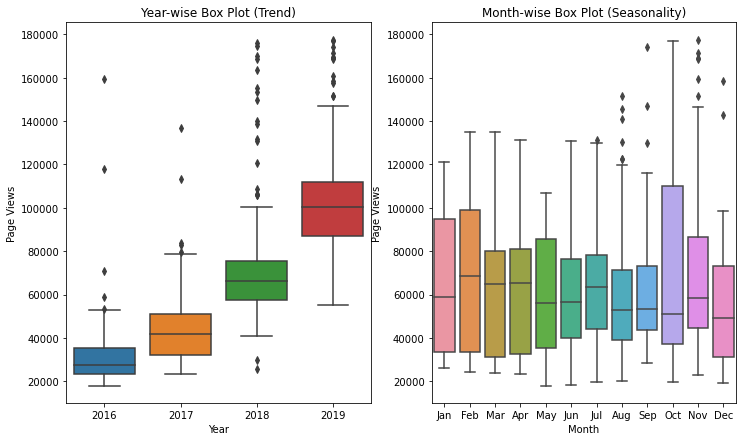

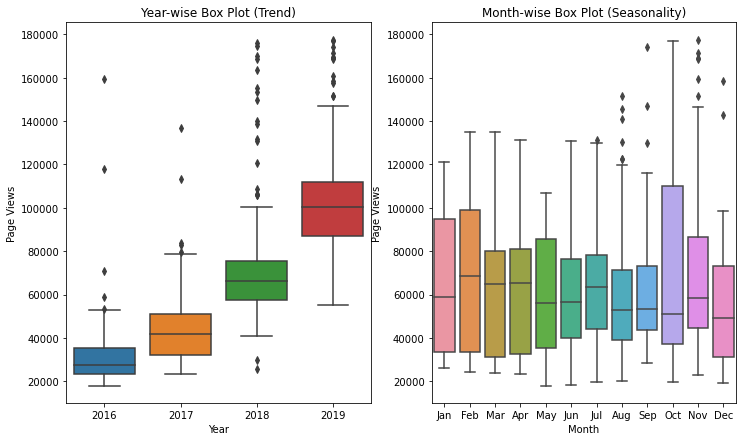

In [12]:
draw_box_plot()

In [8]:
#Solution

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [4]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(1.0-0.025))]

In [5]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    ax.plot(df)
    ax.set(xlabel='Date', ylabel='Page Views', title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

In [6]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.reset_index(level=['date'])

    year_list = []
    month_list = []
    months = {'01' : 'January',
          '02' : 'February',
          '03' : 'March',
          '04' : 'April',
          '05' : 'May',
          '06' : 'June',
          '07' : 'July',
          '08' : 'August',
          '09' : 'September',
          '10' : 'October',
          '11' : 'November',
          '12' : 'December'}
    #Because we can only get values from .strftime in either first three characters of each month or the number corresponding to the month itself, we need to have a dictionary where we can compare these values and get their complete names.
    for rows in df_bar['date']:
        year_list.append(rows.strftime('%Y'))
        y = rows.strftime('%m')
        month_list.append(months[y])

    df_bar['year'] = pd.Series(year_list)
    df_bar['month'] = pd.Series(month_list)
    df_bar = df_bar.drop(columns=['date'])
    
    total = 0
    days = 0
    years = []
    months = []
    average = []
    #This is where we create a new dataframe with three columns: years, months and the average views.
    #We need to count the views for each day and compile them to their specific year and month.
    #We can do that by checking the current row in df_bar and the next row in the df_bar. If the year and month is equal, it means the current line and the next line is still in the same year and month. If not equal, then the entry will be the last line for that month and year and the average will be calculated and added to the list.

    for i in range(0, (len(df_bar['year'])-1)):
        if i == (len(df_bar['year'])-1):
            total += df_bar['value'][i]
            days += 1
            ave = round(total/days, 1)
            years.append(df_bar['year'][i])
            months.append(df_bar['month'][i])
            average.append(ave)
            total = 0
            days = 0
        elif df_bar['year'][i] == df_bar['year'][i + 1] and df_bar['month'][i] == df_bar['month'][i + 1]:
            total += df_bar['value'][i]
            days +=1
        else:
            total += df_bar['value'][i]
            days += 1
            ave = round(total/days, 1)
            years.append(df_bar['year'][i])
            months.append(df_bar['month'][i])
            average.append(ave)
            total = 0
            days = 0

    new_df = pd.DataFrame(columns = ['year', 'month', 'average'])
    new_df['year'] = pd.Series(years)
    new_df['month'] = pd.Series(months)
    new_df['average'] = pd.Series(average)

    month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    fig = sns.catplot(x="year", y="average", hue="month", kind="bar", data=new_df,
                      hue_order=month_list).fig
    plt.legend(labels=month_list,
                loc='upper left', bbox_to_anchor=(0, 1))
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [7]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)

    y = []
    m = []

    for dates in df_box['date']:
        y.append(dates.strftime('%Y'))
        m.append(dates.strftime('%b'))
    
    df_box['year'] = pd.Series(y)
    df_box['month'] = pd.Series(m)

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(figsize=(12, 7), ncols=2, sharex=False)

    ax1 = sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.set_title('Year-wise Box Plot (Trend)')

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    ax2 = sns.boxplot (x='month', y='value', data=df_box, ax=axes[1],
                       order=month_order)                  
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig